## Employee attrition analysis is a type of behavioural analysis where we study the behaviour and characteristics of the employees who left the organization

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

data = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
print(data.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [ ]:
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## look at the distribution of the age in the dataset:

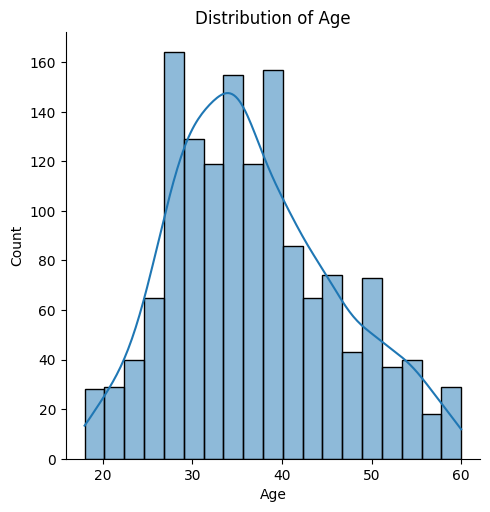

In [ ]:
sns.displot(data['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

### percentage of attrition by department:



In [ ]:
# Filter the data to show only "Yes" values in the "Attrition" column
attrition_data = data[data['Attrition'] == 'Yes']

# Calculate the count of attrition by department
attrition_by = attrition_data.groupby(['Department']).size().reset_index(name='Count')

# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=attrition_by['Department'],
    values=attrition_by['Count'],
    hole=0.4,
    marker=dict(colors=['#3CAEA3', '#F6D55C']),
    textposition='inside'
)])

# Update the layout
fig.update_layout(title='Attrition by Department', font=dict(size=16), legend=dict(
    orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1
))

# Show the chart
fig.show()

## percentage of attrition by education field

In [ ]:
attrition_by = attrition_data.groupby(['EducationField']).size().reset_index(name='Count')

# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=attrition_by['EducationField'],
    values=attrition_by['Count'],
    hole=0.4,
    marker=dict(colors=['#3CAEA3', '#F6D55C']),
    textposition='inside'
)])

# Update the layout
fig.update_layout(title='Attrition by Educational Field', font=dict(size=16), legend=dict(
    orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1
))

# Show the chart
fig.show()

## attrition by number of years at the company:

In [ ]:
attrition_by = attrition_data.groupby(['YearsAtCompany']).size().reset_index(name='Count')

# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=attrition_by['YearsAtCompany'],
    values=attrition_by['Count'],
    hole=0.4,
    marker=dict(colors=['#3CAEA3', '#F6D55C']),
    textposition='inside'
)])

# Update the layout
fig.update_layout(title='Attrition by Years at Company', font=dict(size=16), legend=dict(
    orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1
))

# Show the chart
fig.show()

## attrition by the number of years since the last promotion:

In [ ]:
attrition_by = attrition_data.groupby(['YearsSinceLastPromotion']).size().reset_index(name='Count')

# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=attrition_by['YearsSinceLastPromotion'],
    values=attrition_by['Count'],
    hole=0.4,
    marker=dict(colors=['#3CAEA3', '#F6D55C']),
    textposition='inside'
)])

# Update the layout
fig.update_layout(title='Attrition by Years Since Last Promotion', font=dict(size=16), legend=dict(
    orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1
))

# Show the chart
fig.show()

### by gender:

In [ ]:
attrition_by = attrition_data.groupby(['Gender']).size().reset_index(name='Count')

# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=attrition_by['Gender'],
    values=attrition_by['Count'],
    hole=0.4,
    marker=dict(colors=['#3CAEA3', '#F6D55C']),
    textposition='inside'
)])

# Update the layout
fig.update_layout(title='Attrition by Gender', font=dict(size=16), legend=dict(
    orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1
))

# Show the chart
fig.show()

### analyzing the relationship between monthly income and the age of the employees:

In [ ]:
fig = px.scatter(data, x="Age", y="MonthlyIncome", color="Attrition", trendline="ols")
fig.update_layout(title="Age vs. Monthly Income by Attrition")
fig.show()

### Preprocesssing

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Attrition'] = le.fit_transform(data['Attrition'])
data['BusinessTravel'] = le.fit_transform(data['BusinessTravel'])
data['Department'] = le.fit_transform(data['Department'])
data['EducationField'] = le.fit_transform(data['EducationField'])
data['Gender'] = le.fit_transform(data['Gender'])
data['JobRole'] = le.fit_transform(data['JobRole'])
data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])
data['Over18'] = le.fit_transform(data['Over18'])
data['OverTime'] = le.fit_transform(data['OverTime'])

In [ ]:
correlation = data.corr()
print(correlation["Attrition"].sort_values(ascending=False))

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

In [ ]:
data['SatisfactionScore'] = data['EnvironmentSatisfaction'] + data['JobSatisfaction'] + data['RelationshipSatisfaction']

## split the data into training and test sets:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X = data.drop(['Attrition'], axis=1)
y = data['Attrition']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain, ytrain)

# Evaluate the model's performance
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy)

Accuracy: 0.8662131519274376


In [ ]:
accuracy

0.8662131519274376